## Занятие 4
## Математический анализ
## Анализ функции. Построение графика в matplotlib.pyplot
https://matplotlib.org
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
https://matplotlib.org/tutorials/text/annotations.html

In [3]:
# Импорт библиотеки matplotlib.pyplot обычно осуществляется так:
import matplotlib.pyplot as plt
from sympy import Symbol, symbols, S, solve, solveset, latex, fraction, Eq
from numpy import pi
from sympy.calculus.util import continuous_domain  
# А для того, чтобы использовать все остальное, сделаем так:
import sympy
import numpy as np

### Задание 1
Найти точки пересечения графика функции $f(x) = (x^2 + 3 x - 2)\log_2(3x+1)$ с осями координат, построить график и отметить точки пересечения.

#### Указание. 
Определить функцию как в Примере 3, поскольку нужно будет использовать функцию  $\log_2(x)$ из каждого пакета sympy и numpy.
В numpy использовать $log2(x)$ для вычисления логарифма по основанию 2.

Сроить график только в пределах области определения функции. Точки пересечения с осью OX должны быть не только решениями соответствующего уравнения, но и принадлежать области определения функции.

Interval.open(-1/3, oo)

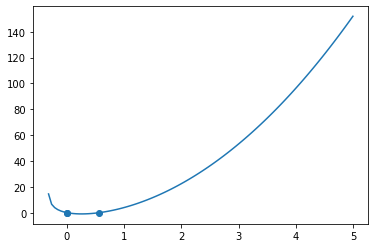

In [4]:
x = Symbol('x')
def f(x, lib='sympy'):
    if lib == 'sympy':
        return (x**2 + 3*x - 2) * sympy.log(3*x + 1, 2)
    elif lib == 'numpy':
        return (x**2 + 3*x - 2) * np.log2(3*x + 1)

display(continuous_domain(f(x), x, S.Reals))

xIntersection = solve(f(x))
xList = []
for i in xIntersection:
    if (i > -1/3):
        xList.append(i)
        
X = np.linspace(-1/3 + 0.01, 5, 100)
plt.plot(X, f(X, 'numpy'))

cord = [0]*len(xList)
xList.append(0)
cord.append(f(0, 'numpy'))
plt.scatter(xList, cord)

### Задание 2
Найти асимптоты графика функции $g(x) = \frac{35x^2 + 4x - 15}{3x - 2}$, построить график и асимптоты, в легенду графика включить формулы функции и асимптот, подписать оси 'x' и 'y'.

'Нули знаменателя:'

FiniteSet(2/3)

'Предел функции справа:'

oo

'Предел функции слева:'

-oo

'Наклонная асимптота:'

35/3

'Предел:'

82/9

'Асимптота'

35*x/3 + 82/9

Text(0, 0.5, 'y')

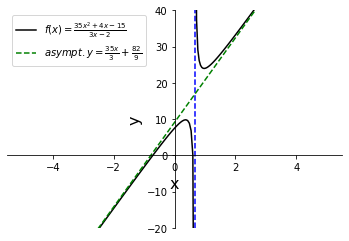

In [5]:
def g(x):
    return (35*x**2 + 4*x - 15)/(3*x - 2)

gnum, gdenom = sympy.fraction(g(x)) 
null = sympy.solveset(gdenom, x) 
display('Нули знаменателя:', null)

ypos = sympy.limit(g(x), x, +sympy.oo)
yneg = sympy.limit(g(x), x, -sympy.oo)
display('Предел функции справа:', ypos, 'Предел функции слева:', yneg) # Оба предела бесконечные => горизонтальных асимптот нет.

kpos = sympy.limit(g(x)/x, x, +sympy.oo)
kneg = sympy.limit(g(x)/x, x, -sympy.oo)
if kpos == kneg:
    k = kpos
else:
    k = (kneg, kpos)
display('Наклонная асимптота:', k)

b = sympy.limit(g(x) - k*x, x, sympy.oo) # Вычислим предел (f(x) - k(x)).
display('Предел:', b)

y_asymptote = k*x +b
display('Асимптота', y_asymptote)

minY = -20  
maxY = 40
ax = plt.gca()
ax.set(ylim=(minY, maxY))
for item in null:
    ax.axvline(x=item, color='blue', linestyle='--')    
X1 = np.linspace(-5, float(item - 0.01), 100) 
X2 = np.linspace(float(item + 0.01), 5, 100)
Y1 = g(X1)
Y2 = g(X2)

ax.plot(X1, Y1, 'k-', label=r'$f(x)=' + sympy.latex(g(x)) + r'$') # График левой ветви функции
ax.plot(X2, Y2, 'k-') # График правой ветви функции
ax.plot([X1[0], X2[-1]], [y_asymptote.subs(x, X1[0]), y_asymptote.subs(x, X2[-1])], 'g--', 
         label=r'$asympt. y=' + sympy.latex(y_asymptote) + r'$') # График наклонной асимптоты
ax.legend(loc='best') # Расположение легенды.

ax.spines['bottom'].set_position(('data', 0)) # Полоска снизу.
ax.spines['left'].set_position(('data', 0)) # Полоска слева.
ax.spines['right'].set_color('none') # Полоска справа.
ax.spines['top'].set_color('none') # Полоска вверху.

ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)

### Задание 3.
Описать в виде функции траекторию пули, выпущенной со скоростью $v_0$ под углом $\alpha$ к горизонту (по умолчанию $v_0 = 0$, $\alpha = \pi/2$)
$$
\left\{
\begin{matrix}
x=v_0t\cos\alpha\\
y=v_0t\sin\alpha-\frac{10t^2}{2}
\end{matrix}
\right.
$$
Аргументы функции $t$, $v_0$ и $\alpha$, результат - два выражения $x$ и $y$, в соответствии с формулами, приведенными выше.

Определить соответствующий набору параметров $v_0$ и $\alpha$ диапазон значений параметра времени $t$, учитывая, что пуля не должна провалиться сквозь землю. 

Построить траектории при заданных значениях начальной скорости и угла на одном графике (($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2$, $\alpha = 1$)). Графики должны быть соответственно зеленого, красного и черного цвета. 

Подписать оси $x$, $y$.

В легенде отразить значения параметров, например, $v_0 = 2,\ \alpha = \pi/6$.

Название графика - Траектории пуль.
#### Указание.
Использовать $\sin$ из numpy.

Решить уравнение $y = 0$ относительно $t$, пользуясь solve или solveset, чтобы с помощью найденного значения $t$ определить правую границу значений $x$.

#### Решение.
Определим функцию, зададим списком данные наборы параметров ($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2.5$, $\alpha = 1$) и найдем значение параметра $t$, при котором  $y = 0$. Затем подстановкой subs в t_interval найдем наибольшее значение $t$ и построим графики:

'Максимумы:'

0.100000000000000

0.282842712474620

0.420735492403948

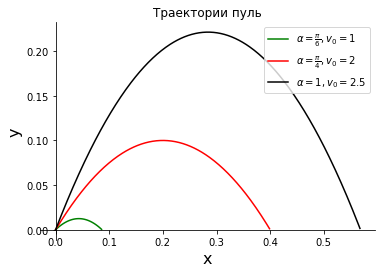

In [10]:
t = Symbol('t')

def shot(t, v0=0, a=pi/2):
    x = v0*t*np.cos(a)
    y = v0*t*np.sin(a) - (10*t**2)/2
    return x, y

def count_t(v0=0, a=pi/2):
    return  solve(v0*t*np.sin(a) - (10*t**2)/2)

def count_x(t, v0=0, a=pi/2):
    return v0*t*np.cos(a)

def count_y(t, v0=0, a=pi/2):
    return v0*t*np.sin(a) - (10*t**2)/2

params = [[1, pi/6], [2, pi/4], [2.5, 1]]

tMax = []
for i in range(len(params)):
    tSols= count_t(params[i][0], params[i][1])
    tMax.append(tSols[1])
display('Максимумы:',*tMax)

gr = plt.gca()
minY = 0
minX = 0.3

gr.set_xlabel("x", fontsize=16)
gr.set_ylabel("y", fontsize=16)

gr.set_title(r'Траектории пуль')

ax.set(ylim=(minY, maxY))

T1 = np.arange(0, tMax[0], 0.001)
X1 = count_x(T1, params[0][0], params[0][1])
Y1 = count_y(T1, params[0][0], params[0][1])
gr.plot(X1, Y1, color='green', label=r'$\alpha = \frac{\pi}{6}' + ',v_0 = ' + latex(params[0][0]) + '$')

T2 = np.arange(0, tMax[1], 0.001)
X2 = count_x(T2, params[1][0], params[1][1])
Y2 = count_y(T2, params[1][0], params[1][1])
gr.plot(X2, Y2, color='red', label=r'$\alpha = \frac{\pi}{4}' + ',v_0 = ' + latex(params[1][0]) + '$')

T3 = np.arange(0, tMax[2], 0.001)
X3 = count_x(T3, params[2][0], params[2][1])
Y3 = count_y(T3, params[2][0], params[2][1])
gr.plot(X3, Y3, color='black', label=r'$\alpha = ' + latex(1) + ',v_0 = ' + latex(params[2][0]) + '$')

gr.legend(loc='upper right')

gr.spines['right'].set_color('none')
gr.spines['top'].set_color('none')
gr.spines['bottom'].set_position(('data', 0))
gr.spines['left'].set_position(('data', 0))

### Индивидуальное задание.
Построить в одной координатной плоскости графики функций $f(x) = $
    $3 - 2 x$, $g(x) = $
    $3 \cos{\left(2 x \right)}$ на 
    отрезке $\left[ \pi / 2, \  3 \pi / 2\right]$, $f(x)$ синяя 
    линия из точек, $g(x)$ фиолетовая пунктирная линия. 
    Отметки на горизонтальной оси от $\pi / 2$ до $3 \pi / 2$ с 
    шагом $\pi / 4$, отметки подписать формулами как в Примере 3.  
    По вертикальной оси отметки $-3$, 0, $3$.

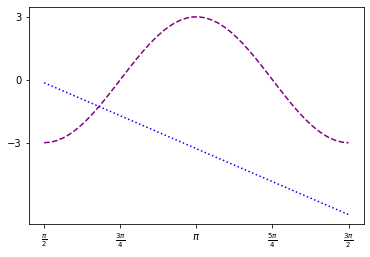

In [33]:
def f(x):
    return 3 - 2*x
def g(x):
    return 3 * np.cos(2*x)

X = np.linspace(pi/2, 3*pi/2)
ax = plt.gca()

ax.plot(X, f(X), color='blue', linestyle=':')
ax.plot(X, g(X), color='purple', linestyle='--')

ax.set_xticks([np.pi/2 + n*np.pi/4 for n in range(5)])
ax.set_xticklabels([r'$' + latex(sympy.pi/2 + n*sympy.pi/4) + r'$' for n in range(5)])

ax.set_yticks([-3, 0, 3])